# Univariate Linear Regression

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import torch
from torch import nn
import pandas as pd
import random
import utils

# to get reproducible results:
torch.manual_seed(1234)
np.random.seed(1234)

In [2]:
'''import ssl
import certifi
ssl._create_default_https_context = ssl.create_default_context(cafile=certifi.where())
'''

'import ssl\nimport certifi\nssl._create_default_https_context = ssl.create_default_context(cafile=certifi.where())\n'

## California Housing dataset

In this session, we'll start with a common task in machine learning, namely  the prediction of house prices. You can easily obtain a dataset from sklearn (that makes it easy to download the dataset, as you'll notice when you run the block below). Let's load it:

In [3]:
from sklearn.datasets import fetch_california_housing
california_housing = fetch_california_housing(as_frame=True)

In [4]:
california_housing.frame.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
from sklearn.model_selection import train_test_split

X, y = california_housing.frame.drop(['MedHouseVal'], axis=1), california_housing.frame['MedHouseVal']

x_train, x_dev_test, y_train, y_dev_test = train_test_split(X, y, test_size=0.2, random_state=42)
x_dev, x_test, y_dev, y_test = train_test_split(x_dev_test, y_dev_test, test_size=0.5, random_state=42)



In [6]:
print(x_train.shape)
print(x_dev.shape)
print(x_test.shape)

print(y_train.shape)
print(y_dev.shape)
print(y_test.shape)


(16512, 8)
(2064, 8)
(2064, 8)
(16512,)
(2064,)
(2064,)


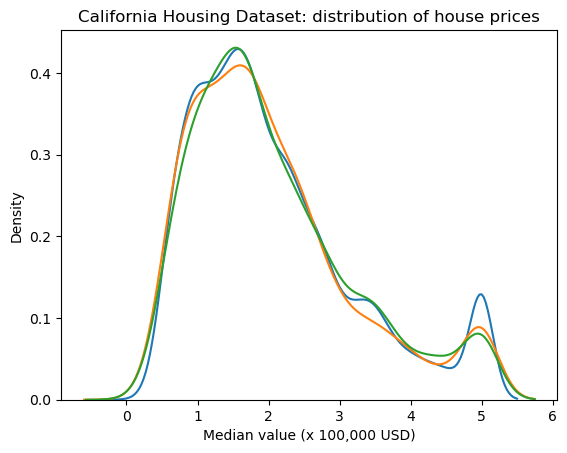

In [7]:
ax = sns.kdeplot(y_train, label='train')
sns.kdeplot(y_dev, ax=ax, label='dev');
sns.kdeplot(y_test, ax=ax, label='test');
plt.title('California Housing Dataset: distribution of house prices')
plt.ylabel('Density');
plt.xlabel('Median value (x 100,000 USD)');